In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text


debris = pd.read_json('data/raw/debris.json')
rockets = pd.read_json('data/raw/rockets.json')
satellites = pd.read_json('data/raw/satellites.json')
unknown = pd.read_json('data/raw/unknown.json')

columnasRename = { 'COSPAR Number': 'COSPAR_Number'}
dropColumnJson = ['COMMENT', 'COMMENTCODE']

satelitesExcel = pd.read_excel('data/raw/ucs-satellite-database.xlsx').rename(columns=columnasRename)

dataframe = pd.concat([debris, rockets, satellites, unknown], ignore_index=True)

dataframe.drop(columns=dropColumnJson, inplace=True)
dataframe

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1960-003C,33,DEBRIS,THOR ABLESTAR DEB,US,1960-04-13,AFETR,1960-07-17,93.59,51.29,...,0,None,1,1960,3,C,Y,THOR ABLESTAR DEB,1960-003C,33
1,1960-005D,37,DEBRIS,SPUTNIK 4 DEB,CIS,1960-05-15,TTMTR,1961-06-30,92.92,64.89,...,0,None,1,1960,5,D,Y,SPUTNIK 4 DEB,1960-005D,37
2,1960-005E,38,DEBRIS,SPUTNIK 4 DEB,CIS,1960-05-15,TTMTR,1960-08-20,90.63,64.89,...,0,None,1,1960,5,E,Y,SPUTNIK 4 DEB,1960-005E,38
3,1960-005F,39,DEBRIS,SPUTNIK 4 DEB,CIS,1960-05-15,TTMTR,1960-09-24,90.99,64.89,...,0,None,1,1960,5,F,Y,SPUTNIK 4 DEB,1960-005F,39
4,1960-005G,40,DEBRIS,SPUTNIK 4 DEB,CIS,1960-05-15,TTMTR,1960-09-24,92.13,64.89,...,0,None,1,1960,5,G,Y,SPUTNIK 4 DEB,1960-005G,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63516,2025-078E,63603,UNKNOWN,OBJECT E,PRC,2025-04-18,TSC,None,105.27,99.69,...,0,None,9108,2025,78,E,Y,OBJECT E,2025-078E,63603
63517,2025-078F,63604,UNKNOWN,OBJECT F,PRC,2025-04-18,TSC,None,105.27,99.69,...,0,None,9108,2025,78,F,Y,OBJECT F,2025-078F,63604
63518,2025-078G,63605,UNKNOWN,OBJECT G,PRC,2025-04-18,TSC,None,103.24,99.70,...,0,None,9108,2025,78,G,Y,OBJECT G,2025-078G,63605
63519,2025-081A,63630,UNKNOWN,OBJECT A,US,2025-04-22,AFETR,None,96.20,45.40,...,0,None,9108,2025,81,A,Y,OBJECT A,2025-081A,63630


In [92]:
#Borrar registros de satelitesExcel que no estan dataFrame Original

ids = dataframe.OBJECT_ID.unique()

ids_borrar = satelitesExcel[~satelitesExcel['COSPAR_Number'].isin(ids)].index

dropColumns = satelitesExcel.columns[27:]

satelitesExcel.drop(index=ids_borrar, inplace=True)
satelitesExcel.drop(columns=dropColumns, inplace=True)


In [93]:
satelitesExcel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6063 entries, 0 to 7559
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6063 non-null   object 
 1   Current Official Name of Satellite  6063 non-null   object 
 2   Country/Org of UN Registry          6062 non-null   object 
 3   Country of Operator/Owner           6063 non-null   object 
 4   Operator/Owner                      6063 non-null   object 
 5   Users                               6063 non-null   object 
 6   Purpose                             6063 non-null   object 
 7   Detailed Purpose                    1205 non-null   object 
 8   Class of Orbit                      6063 non-null   object 
 9   Type of Orbit                       5412 non-null   object 
 10  Longitude of GEO (degrees)          6060 non-null   float64
 11  Perigee (km)                        6056 non-nul

In [96]:
engine = create_engine('sqlite:///data/space_objects.db', echo=False)

satelitesExcel.to_sql('satelitesExcel', engine, if_exists='replace', index=False)
satellites.to_sql('satellitesJson', engine, if_exists='replace', index=False)



20328

In [97]:
query = "select * from satelitesExcel sE join satellitesJson sJ on sE.COSPAR_Number = sJ.OBJECT_ID"
result = pd.read_sql(query, engine)
result

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,0,SMALL,9107,2019,89,H,Y,IHOPSAT-TD,2019-089H,44859
1,AAC AIS-Sat1 (Kelpie 1),AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,0,MEDIUM,9103,2023,1,DC,Y,AAC-AIS-SAT-1,2023-001DC,55107
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,None,LEO,Sun-Synchronous,...,0,SMALL,8887,2017,36,L,Y,AALTO 1,2017-036L,42775
3,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,0,SMALL,8614,2016,25,E,Y,AAUSAT 4,2016-025E,41460
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,None,GEO,None,...,0,MEDIUM,9108,2014,6,A,Y,ABS 2,2014-006A,39508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,0,LARGE,9106,2011,79,A,Y,ZY 1,2011-079A,38038
5882,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,...,0,LARGE,9100,2019,59,A,Y,ZY-1 02D,2019-059A,44528
5883,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,0,LARGE,9107,2012,1,A,Y,ZY 3,2012-001A,38046
5884,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,...,0,LARGE,9108,2016,33,A,Y,ZY 3 2,2016-033A,41556


In [ ]:
#buscar los paises que tienen mas de 50 objetos en el espacio
paises_mas_50 = dataframe['COUNTRY'].value_counts()[dataframe['COUNTRY'].value_counts() > 50]

C:\Users\rbarone\AppData\Local\Temp\ipykernel_29224\116680016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=paises_mas_50.values, x=paises_mas_50.index, orient='vertical', palette='viridis')


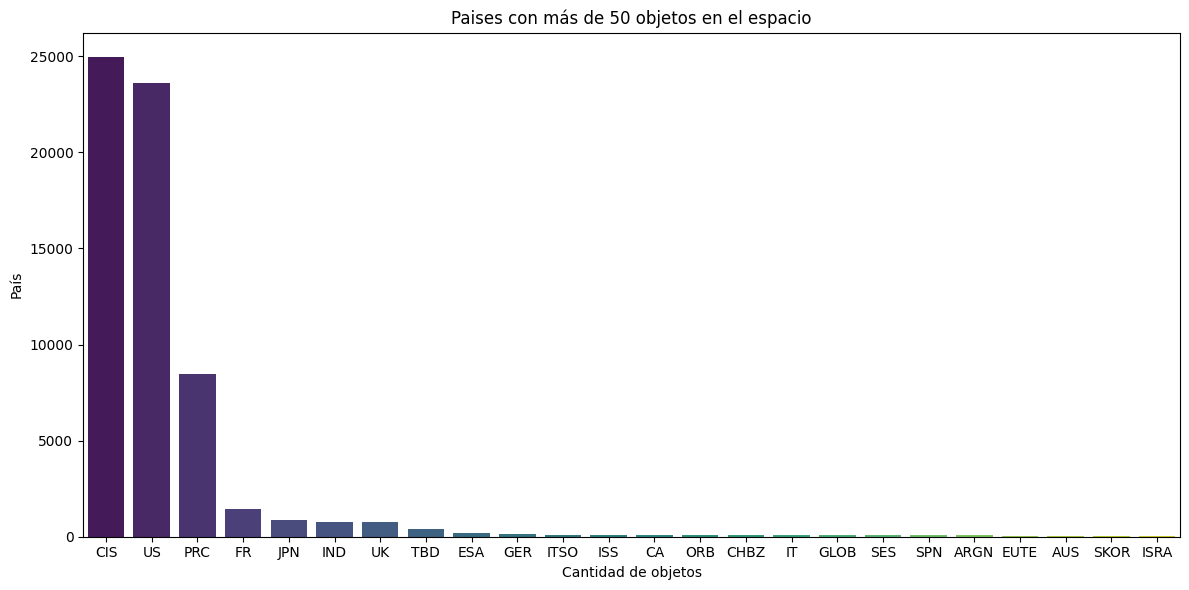

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=paises_mas_50.values, x=paises_mas_50.index, orient='vertical', palette='viridis')
plt.title('Paises con más de 50 objetos en el espacio')
plt.xlabel('Cantidad de objetos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [ ]:
objetos = [
'2022-141AA',
'2022-141Z',
'2022-141Q',
'2023-014D',
'2022-141AB',
'2023-021AZ',
'2022-141D',
'2022-141AS',
'2022-141AE',
'2023-010F',
'2022-141AR',
'2022-141AH',
'2022-141AC',

]

dataframe.loc[dataframe['OBJECT_ID'].isin(objetos)]

# dataframe.loc[dataframe['OBJECT_ID']]

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
47512,2022-141AS,54197,PAYLOAD,STARLINK-5234,US,2022-10-28,AFWTR,2024-04-15,88.16,53.18,...,0,LARGE,8742,2022,141,AS,Y,STARLINK-5234,2022-141AS,54197
48447,2023-014D,55394,PAYLOAD,STARLINK-5230,US,2023-01-31,AFWTR,2024-08-14,91.12,70.00,...,0,LARGE,9029,2023,14,D,Y,STARLINK-5230,2023-014D,55394
49141,2022-141D,54160,PAYLOAD,STARLINK-5233,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9078,2022,141,D,Y,STARLINK-5233,2022-141D,54160
52320,2023-010F,55274,PAYLOAD,STARLINK-5236,US,2023-01-19,AFWTR,None,96.11,70.00,...,0,LARGE,9105,2023,10,F,Y,STARLINK-5236,2023-010F,55274
54033,2022-141AA,54181,PAYLOAD,STARLINK-5227,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9106,2022,141,AA,Y,STARLINK-5227,2022-141AA,54181
54034,2022-141AB,54182,PAYLOAD,STARLINK-5231,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9106,2022,141,AB,Y,STARLINK-5231,2022-141AB,54182
54035,2022-141AC,54183,PAYLOAD,STARLINK-5239,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9106,2022,141,AC,Y,STARLINK-5239,2022-141AC,54183
54037,2022-141AE,54185,PAYLOAD,STARLINK-5235,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9106,2022,141,AE,Y,STARLINK-5235,2022-141AE,54185
54041,2022-141AR,54196,PAYLOAD,STARLINK-5237,US,2022-10-28,AFWTR,None,95.44,53.22,...,0,LARGE,9106,2022,141,AR,Y,STARLINK-5237,2022-141AR,54196
60035,2022-141Q,54171,PAYLOAD,STARLINK-5229,US,2022-10-28,AFWTR,None,91.36,53.22,...,0,MEDIUM,9108,2022,141,Q,Y,STARLINK-5229,2022-141Q,54171


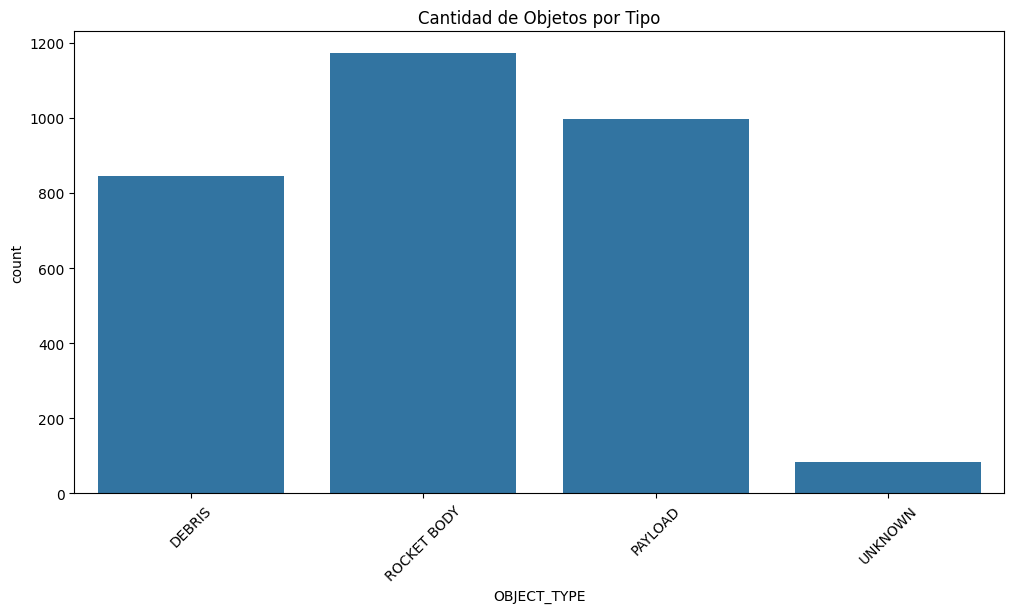

In [ ]:
# dataframe.loc[ dataframe.APOGEE < 160]

#crear un grafico para ver la cantidad de objetos segun su object_type
plt.figure(figsize=(12, 6))
sns.countplot(data=result, x='OBJECT_TYPE')
plt.title('Cantidad de Objetos por Tipo')
plt.xticks(rotation=45)
plt.show()
